In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Reading Training and Test Data

In [3]:
dataset_train = pd.read_csv('./train.csv')
dataset_test = pd.read_csv('./test.csv')

In [4]:
dataset_train.shape
dataset_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataset_test.shape
dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Extracting features and labels from training data 

In [6]:
labels = dataset_train['label']
features = dataset_train.drop(['label'], axis = 1)

In [7]:
features.shape

(42000, 784)

# Reshaping features to 28 by 28 images

In [8]:
features = np.asarray(features)
labels = np.asarray(labels)
features = features.reshape((42000, 28, 28))
features.shape

(42000, 28, 28)

# Plotting some sample of dataset

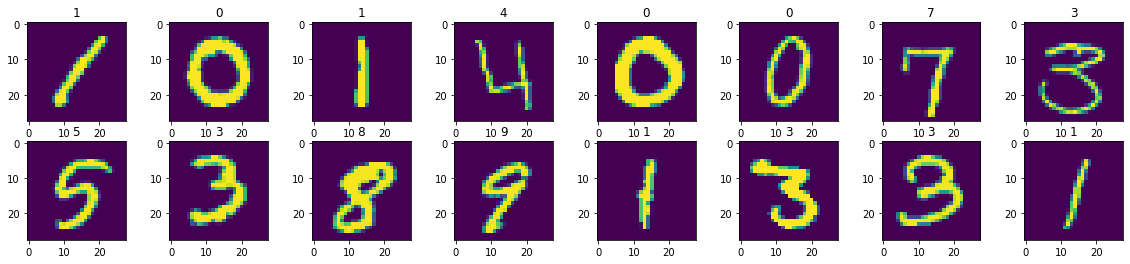

In [10]:
plt.figure(figsize = (20, 4))
for i in range(16):
  plt.subplot(2, 8, i + 1)
  plt.imshow(features[i])
  plt.title(labels[i])
plt.show()

# **Again reshaping the features to feed to the neural network**

In [21]:
features = features.reshape((42000, 784))
features.shape

(42000, 784)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=5)

# Model

In [77]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(55, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
        Dense(25, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
        Dense(15, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
        Dense(10, activation="linear")
    ], name = "my_model" 
)

In [78]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 55)                43175     
                                                                 
 dense_25 (Dense)            (None, 25)                1400      
                                                                 
 dense_26 (Dense)            (None, 15)                390       
                                                                 
 dense_27 (Dense)            (None, 10)                160       
                                                                 
Total params: 45,125
Trainable params: 45,125
Non-trainable params: 0
_________________________________________________________________


In [79]:
[layer1, layer2, layer3, layer4] = model.layers

In [80]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b3 shape = {b4.shape}")

W1 shape = (784, 55), b1 shape = (55,)
W2 shape = (55, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)
W4 shape = (15, 10), b3 shape = (10,)


# Compiling the model

In [81]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

In [87]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1050/1050 [==============================] - 2s 1ms/step - loss: 0.1661 - accuracy: 0.9720
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1635 - accuracy: 0.9737
Epoch 3/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1615 - accuracy: 0.9737
Epoch 4/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1646 - accuracy: 0.9732
Epoch 5/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1690 - accuracy: 0.9716
Epoch 6/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1626 - accuracy: 0.9741
Epoch 7/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1629 - accuracy: 0.9727
Epoch 8/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1640 - accuracy: 0.9741
Epoch 9/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1643 - accuracy: 0.9738
Epoch 10/100
1050/1050 [==============================] - 1s 1ms/step - l

In [88]:
imageOfFour = features[3]
prediction = model.predict(imageOfFour.reshape(1, 784))
print(prediction)
print(np.argmax(prediction))

[[-2.2900186 -2.1960433 -1.2420611 -5.561541   5.852543  -2.8793273
  -4.619697  -2.5303645 -1.7975937  1.7804173]]
4


# **Result**

# Evaluating the Model

In [89]:
model.evaluate(X_train, y_train, batch_size= 128)

263/263 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.9822


[0.13490663468837738, 0.9821726083755493]

In [90]:
model.evaluate(X_test, y_test, batch_size= 128)

66/66 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9658


[0.20237642526626587, 0.965833306312561]

In [91]:
features_test = np.asarray(dataset_test)
features_test.shape

(28000, 784)

# **Testing on some test dataset images**

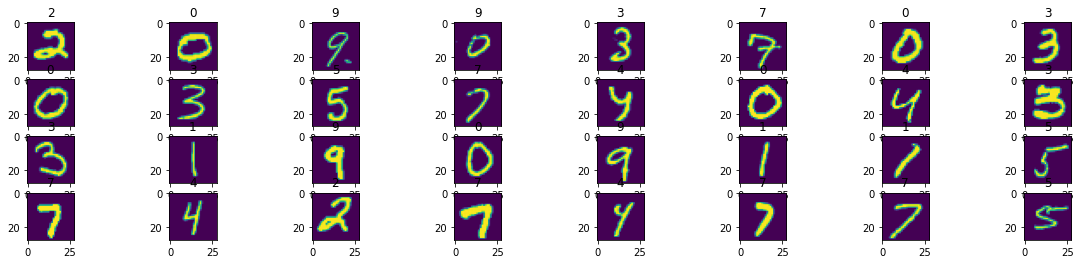

In [92]:
plt.figure(figsize = (20, 4))
for i in range(32):
  plt.subplot(4, 8, i + 1)
  plt.imshow(features_test[i].reshape((28, 28)))
  prediction = model.predict(features_test[i].reshape(1, 784))
  plt.title(np.argmax(prediction))
plt.show()
